<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="cognitiveclass.ai logo">
</center>


# Machine Learning Foundation

## Course 4, Part b: Distance and the Curse of Dimensionality DEMO


Estimated time needed: **45** minutes


In [ ]:
# Define a custom warning function that does nothing (suppresses warnings)
# Parameters: *args - variable positional arguments, **kwargs - variable keyword arguments
def warn(*args, **kwargs):
    pass

# Import the warnings module to handle warning messages
import warnings
# Override the default warn function with our custom function to suppress all warnings
warnings.warn = warn

# Import seaborn for statistical data visualization (aliased as sns)
# Import pandas for data manipulation and analysis (aliased as pd)
# Import numpy for numerical computing (aliased as np)
import seaborn as sns, pandas as pd, numpy as np

In [ ]:
# Import pyplot module from matplotlib for creating visualizations (aliased as plt)
from matplotlib import pyplot as plt
# Import numpy for numerical operations and array manipulation (aliased as np)
import numpy as np

# Curse of Dimensionality 

### DEMO objectives: 
* Gain understanding of why observations are far apart in high-dimensional space
* See an example of how adding dimensions degrades model performance for classification
* Learn how to fight the curse of dimensionality in your modeling projects

-----

### In high-dimensional space, points tend to be far apart.
This impacts data analysis. Intuitively, clustering is difficult when points are far away from each other: If my next nearest neighbor is very far away, does it still make sense to call it my neighbor? This notebook will show why high-dimensional space leads to sparse data. 


### A circle inside a square 

Let's start by drawing a unit circle inside of a square. 


In [ ]:
# Function to visualize a unit circle inside a square
# Parameter: point - integer flag (0 or non-zero) to show/hide a purple point outside the circle
def make_circle(point=0):
    # Get the current figure
    fig = plt.gcf()
    # Add a subplot with equal aspect ratio to ensure the circle appears circular
    ax = fig.add_subplot(111, aspect='equal')
    # Draw a unit circle centered at origin (0,0) with radius 1 and 50% transparency
    fig.gca().add_artist(plt.Circle((0,0),1,alpha=.5))
    # Plot the center point (origin) as a small black dot
    ax.scatter(0,0,s=10,color="black")
    # Draw a line from origin to the edge representing the radius
    # Creates 100 evenly spaced points from 0 to 1 on x-axis, all at y=0
    ax.plot(np.linspace(0,1,100),np.zeros(100),color="black")
    # Add text label "r" to indicate radius
    ax.text(.4,.1,"r",size=48)
    # Set x-axis limits from -1 to 1
    ax.set_xlim(left=-1,right=1)
    # Set y-axis limits from -1 to 1
    ax.set_ylim(bottom=-1,top=1)
    # Label x-axis as "Covariate A"
    plt.xlabel("Covariate A")
    # Label y-axis as "Covariate B"
    plt.ylabel("Covariate B")
    # Add plot title
    plt.title("Unit Circle")
    
    # If point parameter is non-zero, add a purple point outside the circle
    if point:
        # Add text label "Far away" in purple
        ax.text(.55,.9,"Far away",color="purple")
        # Plot a purple point at coordinates (0.85, 0.85) outside the unit circle
        ax.scatter(.85,.85,s=10,color="purple")
    else: 
        # Display the plot
        plt.show()
    
# Call the function with default parameter (no purple point)
make_circle()

Each axis is a different covariate. Imagine we've standard scaled our data, so they're centered on zero. This means that the average for each covariate is now zero, or the center of our circle. Points that our outside the unit circle would be harder to classify because the values of their covariates are far from the mean. 


In [ ]:
# Call make_circle function with point=1 to display a point outside the circle
# Parameter: 1 - enables the display of a purple "far away" point at (0.85, 0.85)
make_circle(1)

### How much of the square is outside the circle? And the cube outside the sphere, etc.

We've concluded that our purple point above would be hard to classify because it's far away from the rest of our observations. But what percentage of our points in the square are outside of the circle, and thus "far away"? Let's do some math!

Since the square has length $2r$ and area $(2r)^2$, the percentage of the square outside the circle is:  1 - $\frac {\pi r^2} {(2r)^2} = 1 - \frac \pi 4$ = ~ 21% 

But what about a cube? To illustrate, we will use [matplotlib's 3-D axis](https://matplotlib.org/3.2.1/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) which allows the '3d' projection, as well as the [itertools](https://docs.python.org/3/library/itertools.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) library, which offers a number of efficient tools for looping and combining lists. We will use the [product](https://docs.python.org/2/library/itertools.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01#itertools.product) (cartesian product) and [combinations](https://docs.python.org/2/library/itertools.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01#itertools.combinations) (unique subsequences) functions. 


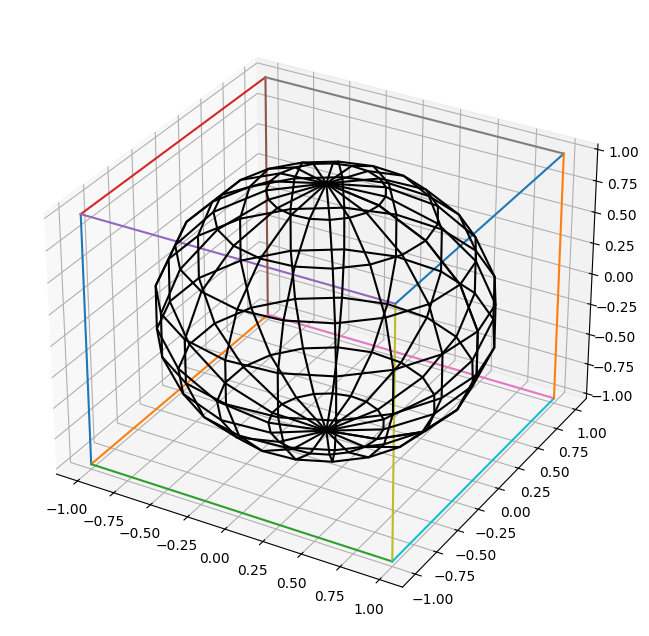

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations

# Create figure 
fig = plt.figure(figsize=(8,8))
# ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection="3d")
#ax.set_aspect("equal")

# Draw cube
r = [-1, 1]
for s, e in combinations(np.array(list(product(r,r,r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s,e))

# Draw sphere on same axis 
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x=np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax.plot_wireframe(x, y, z, color="black");

### Euclidean Distance Formula

The Euclidean distance (or norm) from the origin to a point in n-dimensional space is calculated as:

$$\text{distance} = \sqrt{x_1^2 + x_2^2 + x_3^2 + \ldots + x_n^2} = \sqrt{\sum_{i=1}^{n} x_i^2}$$

Where:
- $x_i$ represents the coordinate value in dimension $i$
- $n$ is the number of dimensions
- For 2D: $\text{distance} = \sqrt{x^2 + y^2}$
- For 3D: $\text{distance} = \sqrt{x^2 + y^2 + z^2}$

A point is inside the unit ball (circle/sphere) if its distance from the origin is less than 1:

$$\sqrt{\sum_{i=1}^{n} x_i^2} < 1$$

In [ ]:
# Plot the percentage of cube volume inside the sphere for each dimension

# Create line plot with blue color
# x-axis: dims (dimensions 2 through 14)
# y-axis: data (percentage of volume inside the sphere)
plt.plot(dims, data, color='blue')
# Label x-axis
plt.xlabel("# dimensions")
# Label y-axis
plt.ylabel("% of area in sphere")
# Add title to the plot
plt.title("What percentage of the cube is in the sphere?")
# Display the plot
plt.show()

Can we generalize beyond two dimensions? 


In [7]:
def what_percent_of_the_ncube_is_in_the_nball(d_dim,
                                              sample_size=10**4):
    shape = sample_size,d_dim
    data = np.array([in_the_ball(np.random.sample(shape)).mean()
                     for iteration in range(100)])
    return data.mean()

dims = range(2,15)
data = np.array(list(map(what_percent_of_the_ncube_is_in_the_nball,dims)))


for dim, percent in zip(dims,data):
    print("Dimension = ", dim, "; percent in ball = ", percent)

Dimension =  2 ; percent in ball =  0.7853080000000001
Dimension =  3 ; percent in ball =  0.5239590000000001
Dimension =  4 ; percent in ball =  0.309098
Dimension =  5 ; percent in ball =  0.16378199999999998
Dimension =  6 ; percent in ball =  0.080629
Dimension =  7 ; percent in ball =  0.03675200000000001
Dimension =  8 ; percent in ball =  0.015832999999999996
Dimension =  9 ; percent in ball =  0.006624000000000001
Dimension =  10 ; percent in ball =  0.002498
Dimension =  11 ; percent in ball =  0.0009330000000000002
Dimension =  12 ; percent in ball =  0.00035500000000000006
Dimension =  13 ; percent in ball =  0.00010400000000000001
Dimension =  14 ; percent in ball =  4.5e-05


In [ ]:
# Function to find the minimum distance from origin among randomly sampled points
# Parameters:
#   dimension - number of dimensions for the space
#   sample_size - number of random points to sample (default 1,000)
# Returns: minimum distance from origin among all sampled points
def get_min_distance(dimension, sample_size=10**3):
    ''' Sample some random points and find the closet 
    of those random points to the center of the data '''
    # Generate random points in [0,1) range, then subtract 0.5 to center at origin (range [-0.5, 0.5))
    points = np.random.sample((sample_size,dimension))-.5   # centering our data
    # Calculate distances and return the minimum
    return np.min(norm(points))

# Function to estimate statistics of the closest point distance across multiple trials
# Parameter: dimension - number of dimensions for the space
# Returns: tuple of (mean, min, max) of the closest point distances across 100 trials
def estimate_closest(dimension):
    ''' For a given dimension, take a random sample in that dimension and then find 
        that sample's closest point to the center of the data. 
        Repeat 100 times for the given dimension and return the min/max/mean 
        of the distance for the nearest point. '''
    # Run get_min_distance 100 times for the given dimension
    data = np.array([get_min_distance(dimension) for _ in range(100)])
    # Return mean, minimum, and maximum of the 100 closest-point distances
    return data.mean(), data.min(), data.max()

# Calculate statistics for dimensions 2 through 99
dims = range(2,100)
# Apply estimate_closest to each dimension and store results
min_distance_data = np.array(list(map(estimate_closest,dims)))

# Test the function for dimension 6 and print results
print("For dimension 6: ", estimate_closest(6))

### Measuring the distance from the center of the cube to the nearest point

Let's continue with our drawing of random points in the cube. This time, we'll draw a bunch of points, then measure the distance of all the points to the center of the cube to see how close the closest point is to the center. 

If we find out that the closest point is far from the center in high dimensions, that gives us more evidence that increasing dimensions will make it harder to classify our data properly. 


In [9]:
def get_min_distance(dimension, sample_size=10**3):
    ''' Sample some random points and find the closet 
    of those random points to the center of the data '''
    points = np.random.sample((sample_size,dimension))-.5   # centering our data
    return np.min(norm(points))

def estimate_closest(dimension):
    ''' For a given dimension, take a random sample in that dimension and then find 
        that sample's closest point to the center of the data. 
        Repeat 100 times for the given dimension and return the min/max/mean 
        of the distance for the nearest point. '''
    data = np.array([get_min_distance(dimension) for _ in range(100)])
    return data.mean(), data.min(), data.max()

# Calculate for dimensions 2-100
dims = range(2,100)
min_distance_data = np.array(list(map(estimate_closest,dims)))

# Test it for dimension 6
print("For dimension 6: ", estimate_closest(6))

For dimension 6:  (np.float64(0.22346258387709686), np.float64(0.08599710606092004), np.float64(0.30583391903372387))


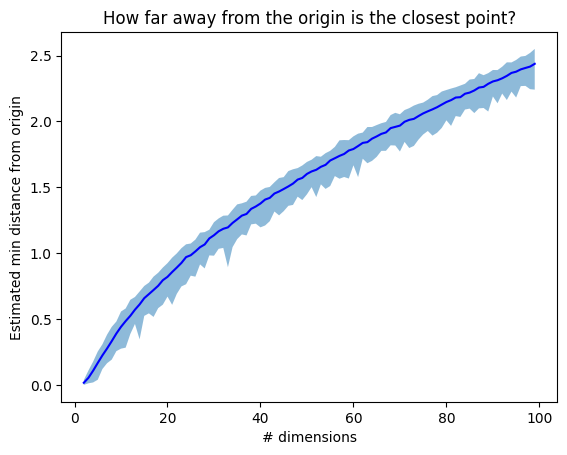

In [10]:
# Plot the min/max/mean of the closest point for each dimension using sampling 

plt.plot(dims,min_distance_data[:,0], color='blue')
plt.fill_between(dims, min_distance_data[:,1], min_distance_data[:,2],alpha=.5)
plt.xlabel("# dimensions")
plt.ylabel("Estimated min distance from origin")
plt.title("How far away from the origin is the closest point?"); 

In [ ]:
# Print the classification accuracy score from the 2-feature model
print("Score from two-feature classifier: ", score)

In [ ]:
# Create and evaluate a classifier with 200 features (demonstrating curse of dimensionality)

# Generate classification data with 200 features:
# Parameters:
#   n_features=200 - total number of features
#   n_redundant=0 - no redundant features
#   n_informative=200 - all 200 features are informative
#   random_state=1 - seed for reproducibility
#   n_clusters_per_class=2 - 2 clusters per class
X, y = make_classification(n_features=200, n_redundant=0, n_informative=200,
                           random_state=1, n_clusters_per_class=2)
# Create random number generator with seed=2
rng = np.random.RandomState(2)
# Add uniform noise to make classification more challenging
X += 2 * rng.uniform(size=X.shape)

# Standardize features to mean=0 and std=1
X = StandardScaler().fit_transform(X)
# Split into 60% training and 40% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

# Initialize Decision Tree classifier
DT = DecisionTreeClassifier()
# Train the model on high-dimensional data
DT.fit(X_train, y_train)
# Evaluate accuracy on test set
score = DT.score(X_test, y_test)

In [ ]:
# Print the classification accuracy score from the 200-feature model
# This score is expected to be lower than the 2-feature model due to curse of dimensionality
print("Score from 200-feature classifier: ", score)

In [14]:
print("Score from two-feature classifier: ", score)

Score from two-feature classifier:  0.875


In [ ]:
# Test classification accuracy across increasing numbers of features
# This demonstrates how the curse of dimensionality affects model performance

# Initialize list to store accuracy scores
scores = []

# Set parameters for the experiment
increment, max_features = 50, 4000

# Loop through different numbers of features from 50 to 4000 in 50 steps
# np.linspace creates 50 evenly spaced values between increment and max_features
for num in np.linspace(increment, max_features, increment, dtype='int'):

    # Generate classification data with 'num' features:
    # Parameters:
    #   n_features=num - number of features (increases each iteration)
    #   n_redundant=0 - no redundant features
    #   random_state=1 - seed for reproducibility
    #   n_clusters_per_class=1 - one cluster per class (simpler structure)
    #   n_classes=3 - three classes to classify
    X, y = make_classification(n_features=num, n_redundant=0, 
                               random_state=1, n_clusters_per_class=1, n_classes = 3)
    # Create random number generator with seed=2
    rng = np.random.RandomState(2)
    # Add uniform noise to the data
    X += 2 * rng.uniform(size=X.shape)

    # Standardize features to mean=0 and std=1
    X = StandardScaler().fit_transform(X)
    # Split into 60% training and 40% testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

    # Initialize Decision Tree classifier
    DT = DecisionTreeClassifier()
    # Train the model
    DT.fit(X_train, y_train)
    # Evaluate and append the accuracy score to the list
    scores.append( DT.score(X_test, y_test) )


In [ ]:
# Plot classification accuracy vs. number of features

# Create line plot of accuracy scores
# x-axis: np.linspace(increment, max_features, increment) - feature counts from 50 to 4000
# y-axis: scores - classification accuracy for each feature count
plt.plot(np.linspace(increment, max_features, increment, dtype='int'),scores)
# Add title to the plot
plt.title("Accuracy of Classification with Increasing Features")
# Label x-axis
plt.xlabel("Number of features")
# Label y-axis
plt.ylabel("Classification accuracy");

Here we see that adding additional features, even if informative, can lead to worse model performance (due to increased overfitting of training data.


### Comparing accuracy of classification against number of features

Let's see what happens if we keep adding features to our classification problem. We'll hold the number of classes at three in order to see how the curse of dimensionality hurts our model performance. 


In [17]:
scores = []

increment, max_features = 50, 4000

for num in np.linspace(increment, max_features, increment, dtype='int'):

    X, y = make_classification(n_features=num, n_redundant=0, 
                               random_state=1, n_clusters_per_class=1, n_classes = 3)
    rng = np.random.RandomState(2)
    X += 2 * rng.uniform(size=X.shape)

    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

    
    DT =  DecisionTreeClassifier()
    DT.fit(X_train, y_train)
    scores.append( DT.score(X_test, y_test) )


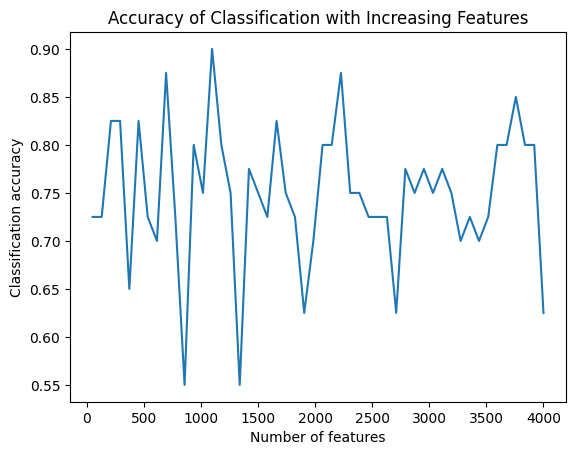

In [18]:
plt.plot(np.linspace(increment, max_features, increment, dtype='int'),scores)
plt.title("Accuracy of Classification with Increasing Features")
plt.xlabel("Number of features")
plt.ylabel("Classification accuracy");

As we can see from the chart, adding features can lead to reductions in accuracy -- in this example accuracy is highly volatile in the number of features, and increasing features can reduce accuracy. Additionally, in our example, we specified that none of the features are redundnant (`n_redundant=0`). In practice, the situation is often worse as several of the features may be either redundant or not relevant. For example, if we are predicting customer churn using a variety of customer characteristics, we may have collected extensive data for each customer across many dimensions. This is an example of high-dimensional, which can make it difficult to apply unsupervised learning methods directly and potentially to lead to issues with the curse of dimensionality.

---
### Machine Learning Foundation (C) 2020 IBM Corporation
